In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# Load the teconer records and preddictions from the pickle file Teconer_10K_predictions.pkl and Teconer_10K_records.pkl
dataset = 'Teconer_1M'
records = pd.read_pickle(dataset+'_records.pkl')
predictions = pd.read_pickle(dataset+'_predictions.pkl')
val_horizon = pd.read_pickle(dataset+'_val_horizon.pkl')

print(len(records), len(predictions))
# # inlcude the predictions in the records as a new column
records['Predictions'] = predictions
records['Validity Horizon'] = val_horizon

print(records.head())



# iterate thru the records grouped by TripID
# and plot the records and the predictions

# remove the records in the same trip with the same AbsoluteTime
records = records.drop_duplicates(subset=['TripID', 'AbsoluteTime'], keep='first')


# change DateTime to datetime
records['DateTime'] = pd.to_datetime(records['DateTime'])


1000000 1000000
   AbsoluteTime             DateTime  Months  Hours   Latitude  Longitude  \
0          3447  2018-01-01 00:57:27       1      0  61.016868  25.826954   
1          3448  2018-01-01 00:57:28       1      0  61.017096  25.827155   
2          3462  2018-01-01 00:57:42       1      0  61.020663  25.829649   
3          3470  2018-01-01 00:57:50       1      0  61.022638  25.830398   
4          3473  2018-01-01 00:57:53       1      0  61.023129  25.830584   

   Friction  Tsurf   Ta  VehicleID  Speed  TripID  Predictions  \
0      0.72  -0.99  0.4         57   99.7   11500     0.587466   
1      0.72  -0.97  0.4         57  100.1   11500     0.587466   
2      0.72  -0.63  0.4         57  100.8   11500     0.720000   
3      0.72  -0.56  0.4         57  100.9   11500     0.720000   
4      0.72  -1.09  0.4         57   99.6   11500     0.720000   

   Validity Horizon  
0                 1  
1                 2  
2                 3  
3                 4  
4             

1045


<Axes: xlabel='DateTime', ylabel='Validity Horizon'>

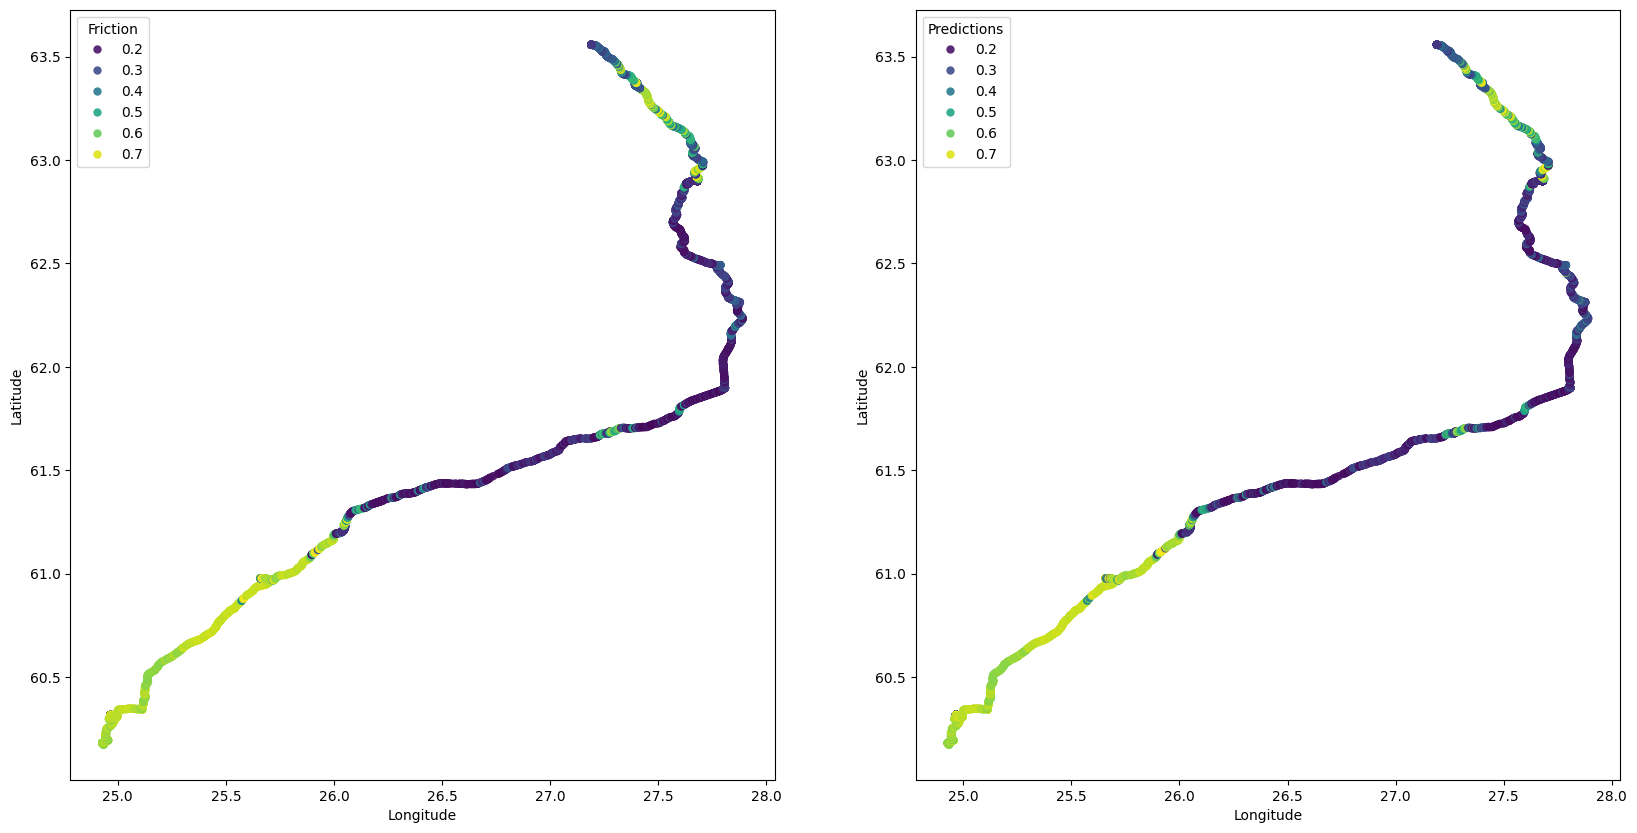

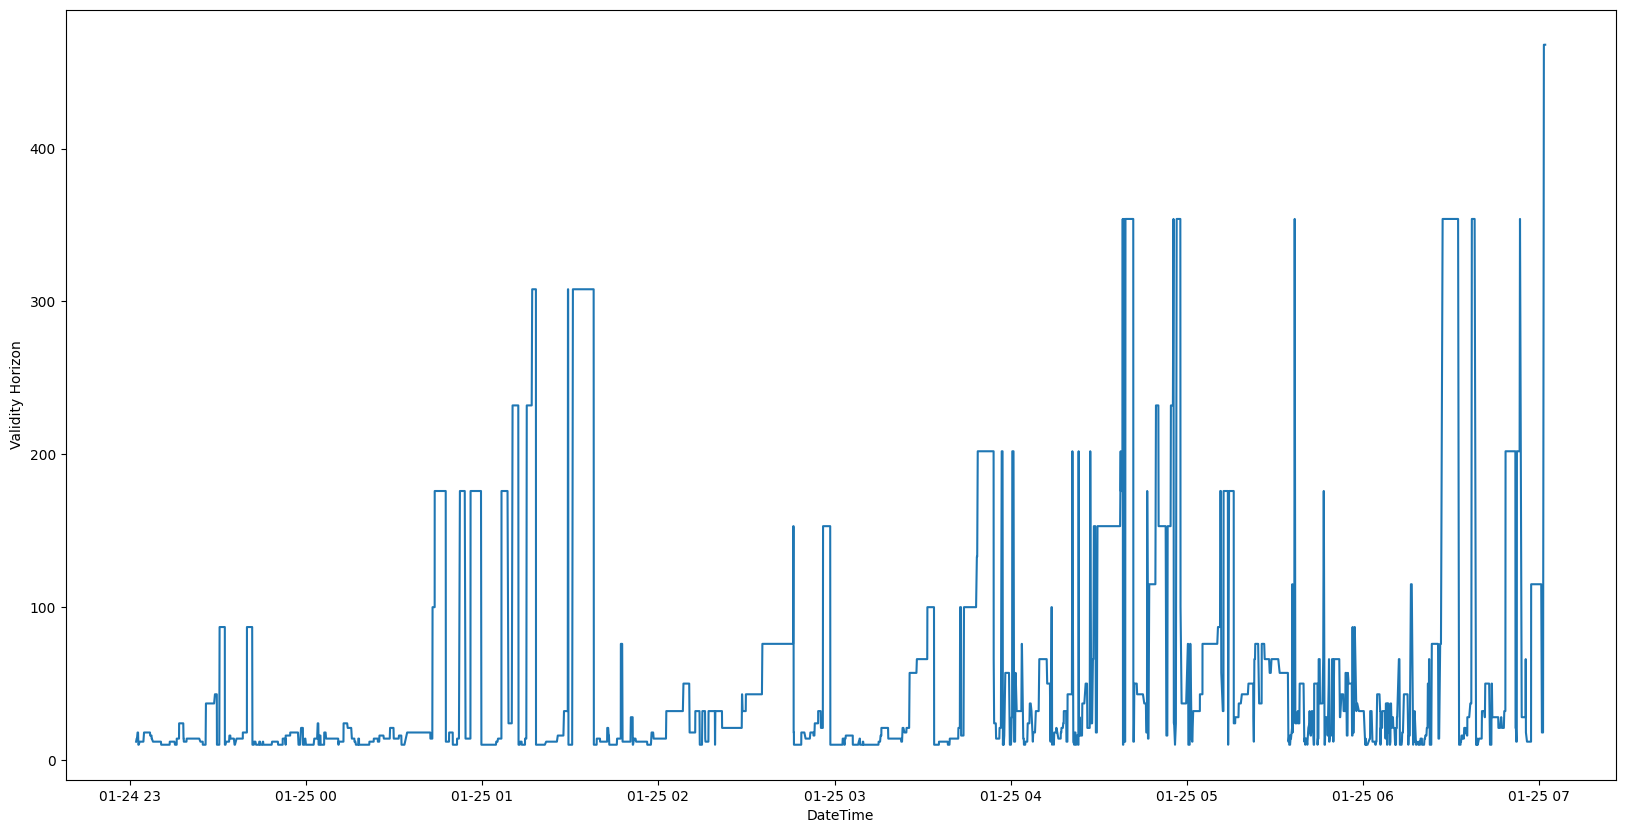

In [16]:
# find the the most frequent TripID and print the number of records for that TripID
# tripID = records['TripID'].value_counts().idxmax()
# print('The most frequent TripID is:', tripID)
# print('The number of records for this TripID is:', records['TripID'].value_counts().max())

# make a list of tripIDs sorted by the number of records
tripIDs = records['TripID'].value_counts().index.tolist()
print(len(tripIDs))
tripID = tripIDs[0]

# scatter Latitude and Longitude of the records with the hue of friction (subplot 1) and the predictions (subplot 2)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fric = sns.scatterplot(x='Longitude', y='Latitude', hue='Friction', data=records[records['TripID'] == tripID], ax=ax[0], alpha=0.9, palette='viridis', linewidth=0)
pred = sns.scatterplot(x='Longitude', y='Latitude', hue='Predictions', data=records[records['TripID'] == tripID], ax=ax[1], alpha=0.9, palette='viridis', linewidth=0)
# show a colorbar for the friction and the predictions


# lineplot of the records friction and the predictions for the most frequent TripID
fig2, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(x='DateTime', y='Validity Horizon', data=records[records['TripID'] == tripID], ax=ax)

# ax.legend(['Measured', 'Predicted'])
# plt.show()




In [ ]:
k = 1
fig, ax = plt.subplots()
for trip_id, trip_records in records.groupby('TripID'):
    trip_records.scatter(x='Latitude', y='Longitude', ax=ax, label=trip_id)
    trip_records.scatter(x='timestamp', y='predictions', ax=ax, label=trip_id, linestyle='dashed')
    k += 1
    if k > 5:
        break